# Forecasting- Airline

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf 
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1AB3-C3C9

 Directory of C:\Users\AANANTHA PRIYA S M\Desktop\resend ass\remail\New folder\remail\ass18

05-04-2023  11:23    <DIR>          .
05-04-2023  00:13    <DIR>          ..
04-04-2023  23:33    <DIR>          .ipynb_checkpoints
07-03-2023  19:19             9,559 Airlines+Data.xlsx
04-04-2023  18:17           187,587 assignment 18(Cola).ipynb
04-04-2023  11:57           163,459 assisgnment 18 -(forecasting- cola).ipynb
16-03-2023  17:34           188,175 assisgnment 18(airline).ipynb
07-03-2023  19:19             9,422 CocaCola_Sales_Rawdata.xlsx
04-04-2023  19:42               781 dataset_cc.csv
07-03-2023  19:19               233 Problem_statement.txt
05-04-2023  11:23           362,515 resend airline.ipynb
04-04-2023  19:49           301,151 resend cola.ipynb
04-04-2023  19:42                98 validation_cc.csv
              10 File(s)      1,222,980 bytes
               3 Dir(s)  46,299,631,616 bytes free


In [3]:
al = pd.read_excel("Airlines+Data.xlsx",sheet_name='Sheet1')
al

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
al.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
al.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [6]:
al.nunique()

Month         96
Passengers    80
dtype: int64

In [7]:
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
al.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [9]:
al.rename({'Month':'Date'}, axis=1, inplace=True)

In [10]:
airline = al.copy()
airline.set_index('Date', inplace=True)
airline.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

<AxesSubplot:xlabel='Date'>

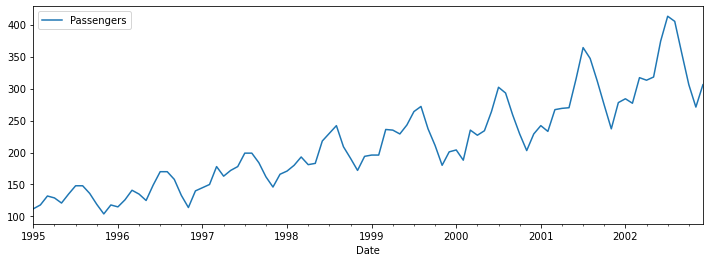

In [11]:
# Line Plot
airline.plot(figsize=(12,4))

<AxesSubplot:>

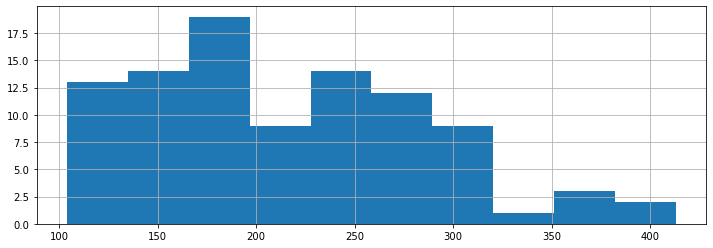

In [13]:
# Histogram
al['Passengers'].hist(figsize=(12,4))

In [14]:
al["Date"]  = pd.to_datetime(al.Date, format="%b-%y")
al["month"] = al.Date.dt.strftime("%b") 
al["year"]  = al.Date.dt.strftime("%Y") 
al.head(10)

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


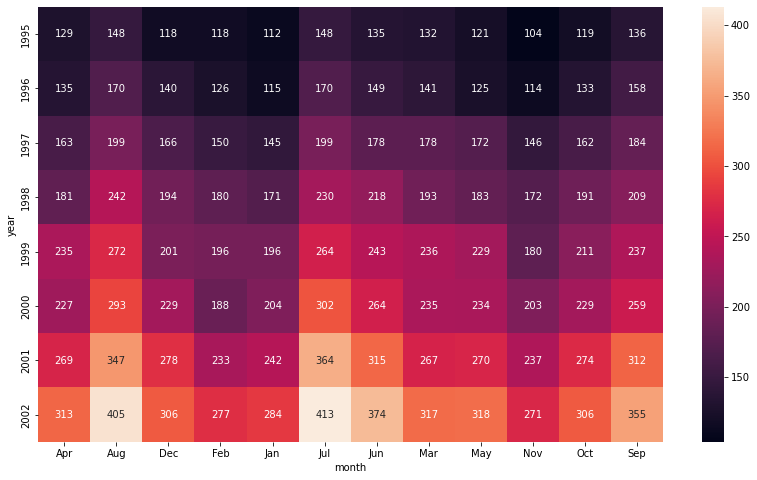

In [15]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=al,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

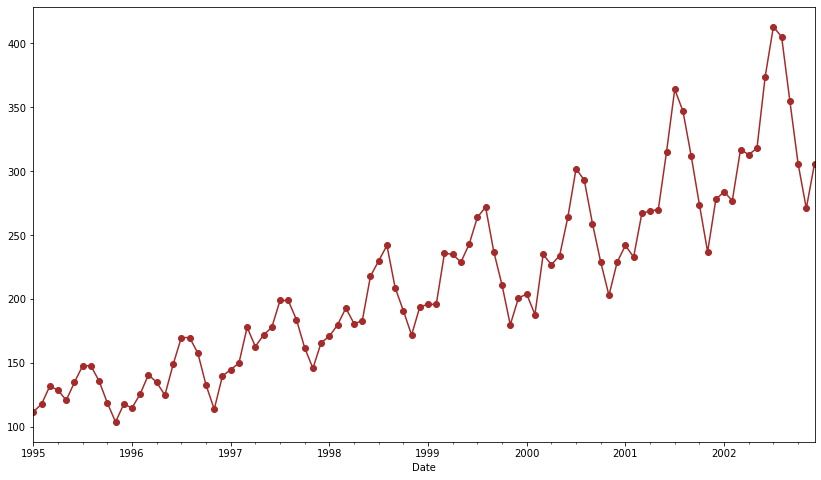

In [16]:
airline['Passengers'].plot(figsize=(14,8),color='brown',marker='o')
plt.show()

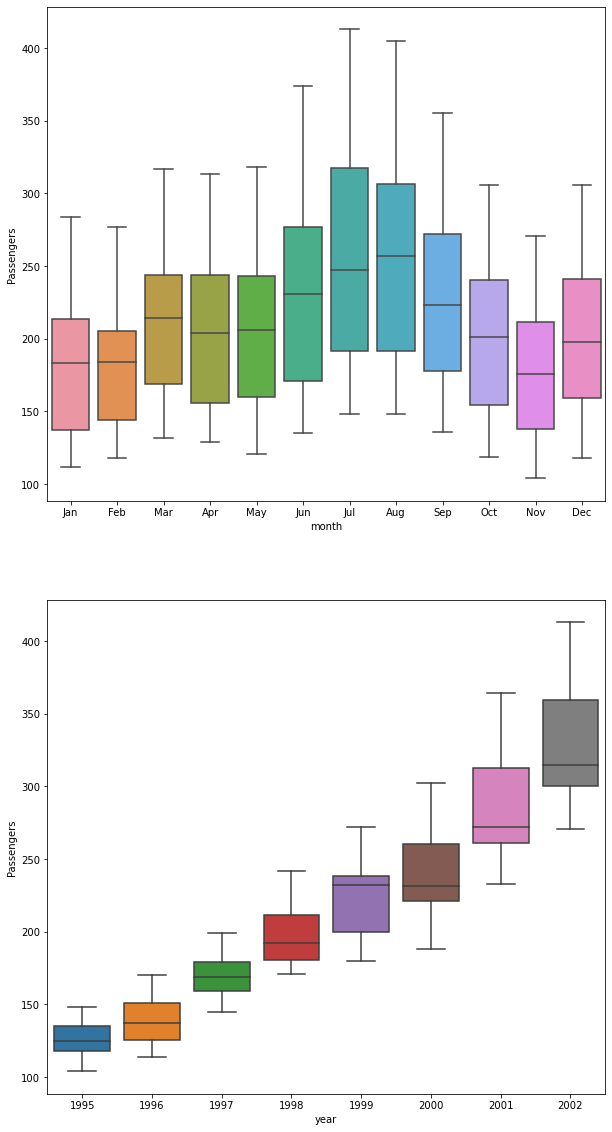

In [17]:
plt.figure(figsize=(10,20))
plt.subplot(211)
sns.boxplot(x="month", y="Passengers", data=al)
plt.subplot(212)
sns.boxplot(x="year", y="Passengers", data=al)
plt.show()

# Time Series Decomposition

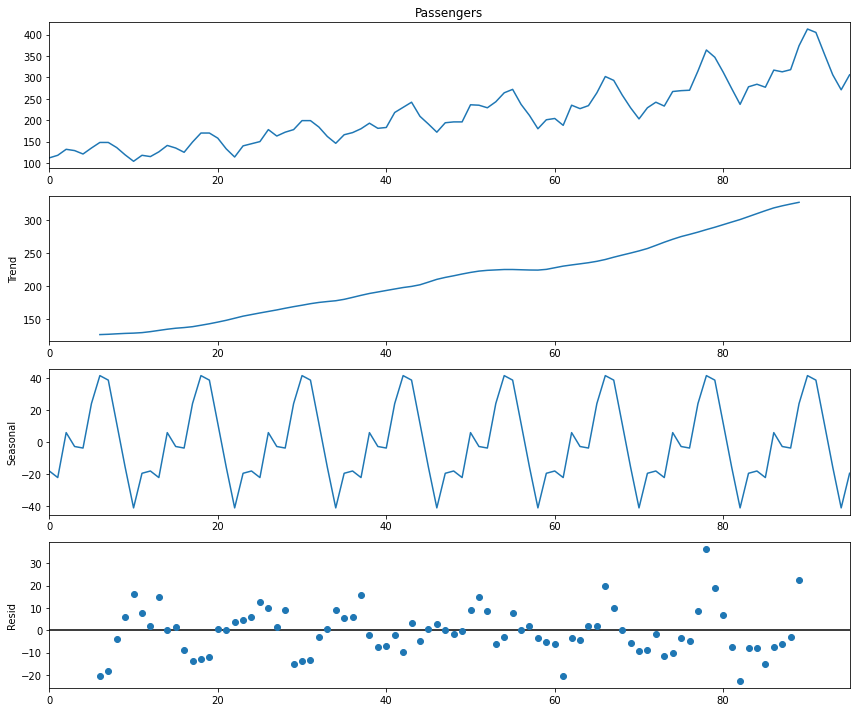

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(al.Passengers, period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

# ACF plots and PACF plots
Autocorrelation Function (ACF)

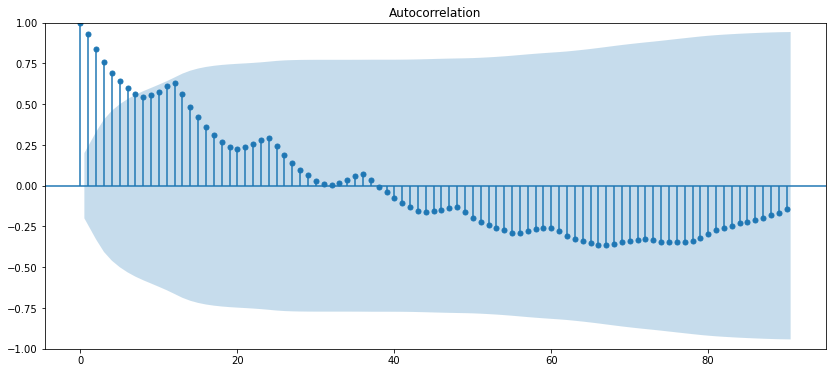

In [20]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(al.Passengers, lags=90)
    plt.show()

# Partial Autocorrelation Function (PACF)

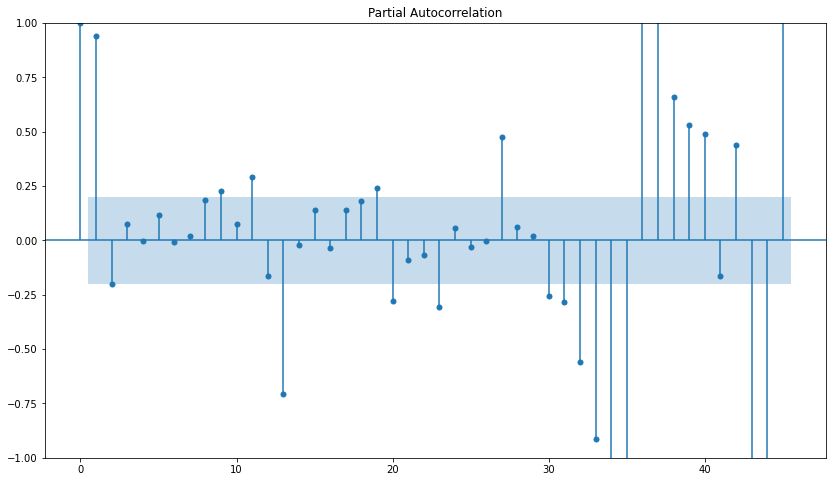

In [21]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,8))
    tsa_plots.plot_pacf(al.Passengers,lags=45)
    plt.show()

# Transformations


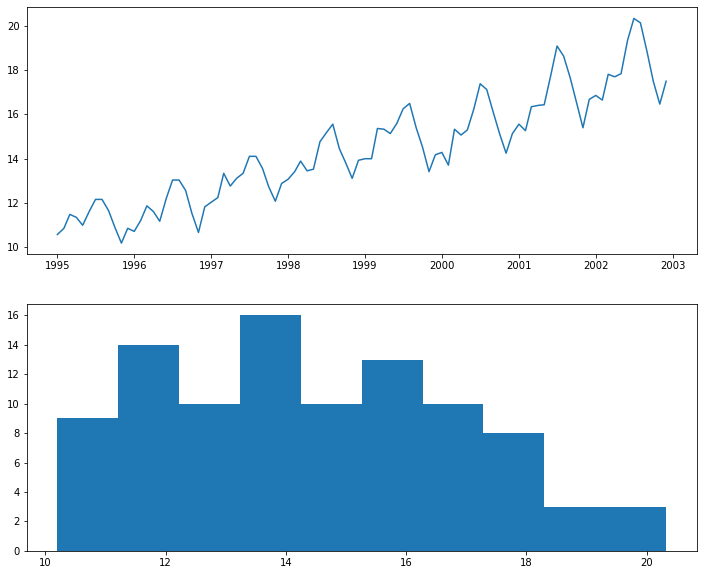

In [29]:
square_root= pd.DataFrame()
square_root = airline[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(square_root['Passengers'])
plt.show()

# Log Transform

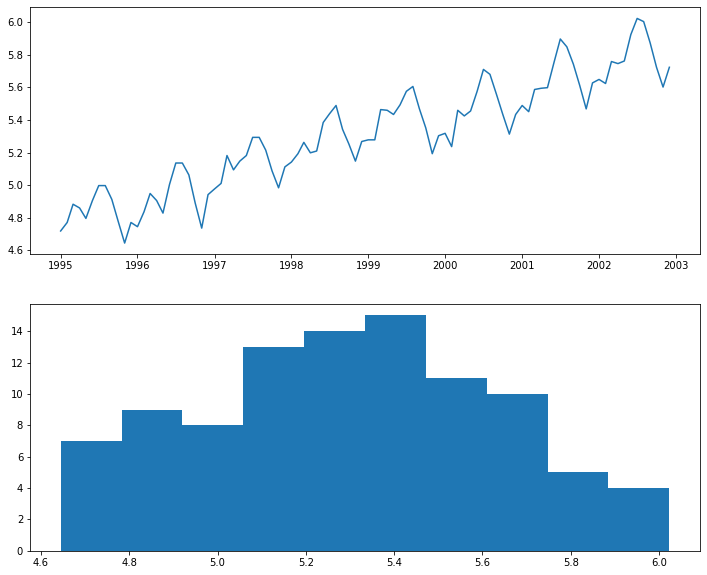

In [31]:
log = pd.DataFrame()
log = airline[['Passengers']]
log['Passengers'] = np.log(log.Passengers)

# line chart
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(log['Passengers'])
plt.show()

# Box Cox Transformation

,Passengers
Date,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791


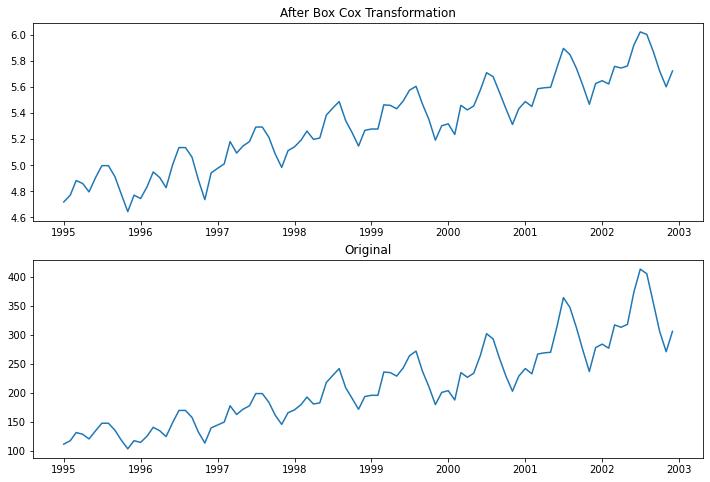

In [33]:
from scipy.stats import boxcox
data_boxcox = pd.DataFrame()
data_boxcox['Passengers'] = pd.Series(boxcox(airline['Passengers'], lmbda=0), airline.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(12,8),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(airline, label='original')
axis[1].set_title('Original')
plt.show()

In [37]:
size = 72
train_data = airline[:size]
test_data = airline[size:]

In [38]:
train_data

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2000-08-01,293
2000-09-01,259
2000-10-01,229


In [39]:
test_data

,Passengers
Date,
2001-01-01,242
2001-02-01,233
2001-03-01,267
2001-04-01,269
2001-05-01,270
2001-06-01,315
2001-07-01,364
2001-08-01,347
2001-09-01,312


In [40]:
print("Length of train data is:",len(train_data))
print("Length of test data is:",len(test_data))


Length of train data is: 72
Length of test data is: 24


# Methods for Forecasting

# 1. Simple Moving Average

In [47]:
al_ma=al.copy()

In [48]:
train_len=72

In [49]:
al_ma['ma_forecast'] = al_ma['Passengers'].rolling(12).mean()

In [50]:
al_ma['ma_forecast'][train_len:] = al_ma['ma_forecast'][train_len-1]

In [51]:
from sklearn.metrics import mean_squared_error

In [53]:
## Calculating RMSE and MAPE
rmse_ma = mean_squared_error(test_data['Passengers'],al_ma['ma_forecast'][train_len:],squared=False).round(2)
rmse_ma

82.89

# 2. Simple Exponential Smoothing

In [55]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [59]:
ses_model = SimpleExpSmoothing(train_data["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])

In [60]:
rmse_ses = mean_squared_error(test_data['Passengers'],pred_ses,squared=False).round(2)
rmse_ses

83.65

# 3. Holt's Method

In [62]:
from statsmodels.tsa.holtwinters import Holt

In [63]:
holt_model = Holt(train_data["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = test_data.index[0],end = test_data.index[-1])

In [64]:
rmse_holt = mean_squared_error(test_data['Passengers'],pred_holt,squared=False).round(2)
rmse_holt

148.19

# 4. Holt's Exponential Smoothing


In [77]:
#a. Additive method

In [78]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [81]:
hes_add_add = ExponentialSmoothing(train_data['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hes_add_add = hes_add_add.predict(start = test_data.index[0],end = test_data.index[-1])

In [83]:
rmse_hes_add_add = mean_squared_error(test_data['Passengers'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

47.57

In [84]:
#b. Multiplicative method

In [85]:
hes_mul_add = ExponentialSmoothing(train_data['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = test_data.index[0],end = test_data.index[-1])

In [86]:
rmse_hes_mul_add = mean_squared_error(test_data['Passengers'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul_add

34.99

# 5. ARIMA model

In [91]:
from statsmodels.tsa.arima.model import ARIMA

In [92]:
arima = ARIMA(train_data['Passengers'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = test_data.index[0],end = test_data.index[-1])

In [94]:
rmse_arima = mean_squared_error(test_data['Passengers'],pred_arima,squared=False).round(2)
rmse_arima

88.96

In [95]:
#Best Model

In [96]:
models=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse_ses,rmse_holt,rmse_hes_add_add,rmse_hes_mul_add,rmse_arima]
d={'Models':models,'Rmse':rmse}
df_model=pd.DataFrame(d)
df_model

,Models,Rmse
0,simple_moving_average,82.89
1,simple_expo_smoothing,83.65
2,Holt,148.19
3,Holt_additive,47.57
4,Holt_multiplicative,34.99
5,ARIMA,88.96


In [97]:
data = {"Models":pd.Series(['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']),
        "RMSE_Values":pd.Series([rmse_ma,rmse_ses,rmse_holt,rmse_hes_add_add,rmse_hes_mul_add,rmse_arima])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

In [100]:
e = table_rmse.append(df_model)
e.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


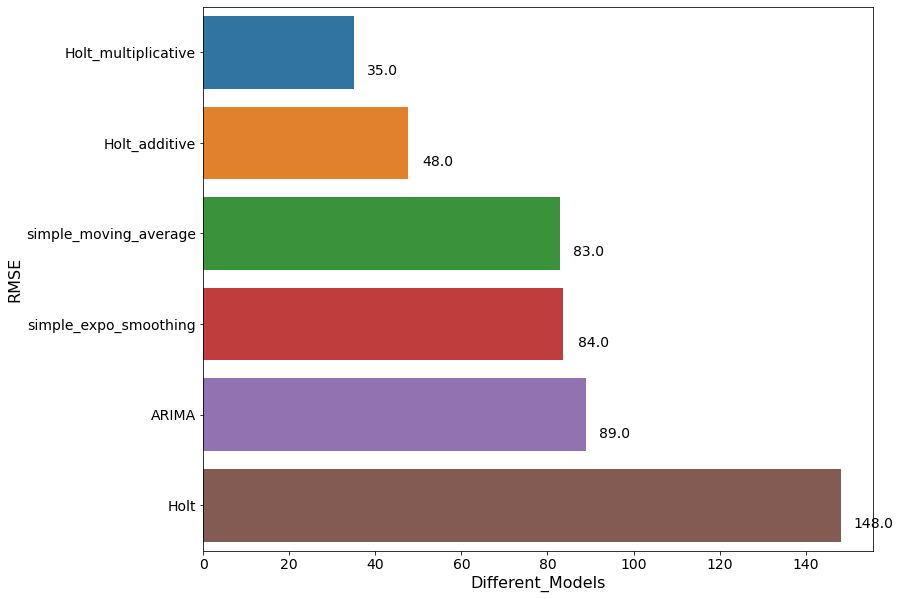

In [104]:
f, axe = plt.subplots(1,1, figsize=(12,10))
sns.barplot(x='RMSE_Values', y='Models', data=e, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(e.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 14)

plt.show()

# The best model we have got so far with the lowest RMSE is HOLT METHOD